In [37]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

 

In [38]:

df = pd.read_csv("New_ionStats.csv")
df_cat = df.astype('Spec_int')
df_cat.dtypes
del df.index.name
df

TypeError: data type 'Spec_int' not understood

In [34]:
Z = linkage(df, 'ward')

ValueError: The condensed distance matrix must contain only finite values.

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [27.5, 27.5, 73.75, 73.75],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [130.0, 130.0, 152.5, 152.5],
  [110.0, 110.0, 141.25, 141.25],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [175.0, 175.0, 193.75, 193.75],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [235.0, 235.0, 260.0, 260.0],
  [225.0, 225.0, 247.5, 247.5],
  [184.375, 184.375, 236.25, 236.25],
  [125.625, 125.625, 210.3125, 210.3125],
  [50.625, 50.625, 167.96875, 167.96875],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [3

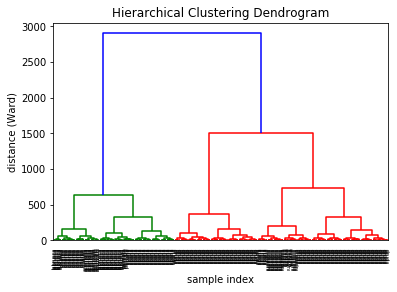

In [11]:
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
dendrogram(Z, labels=df.index, leaf_rotation=90)